# **3.5  SCIKIT-LEARN**

## **SCIKIT-LEARN INSTALLATION**

In [1]:
import sklearn
print(sklearn. __version__ ) #outputs the version of Scikit-learn.

1.5.1


## **3.5.1 SCIKIT-LEARN API**
The scikit-learn API consists of three basic interfaces that allow it to do most of the machine learning tasks.
- Estimator interface: It denotes the fundamental interface applied in scikit-learn. It uses the fit() method to train the machine learning model on the given dataset.
- Predictor interface: This is an extension of the estimator interface that uses the predict() method to make useful predictions given the test features.
- Transformer interface: It helps to perform various transformations on the data by enabling the transform() method.

# Example 3.5.1
In this example we discuss how to use the scikit-learn instances to construct a basic machine learning pipeline.

In [2]:
import numpy as np

class Data:
    def __init__(self, N, sigma):
        self.N=N #Number of data per cluster.
        self.sigma=sigma #standard deviation of the clusters.

    def data_xor(self, classes):
        X=self.sigma*np.random.randn(2,4*self.N) # Generate 4*N random vectors (gaussian) centered around zero
        mean=np.array([[-1,-1, 1, 1],[-1,1,-1,1]]) # define four means
        M=np.ones((self.N,2))*mean[:,0] # Means of the first cluster
        y=np.ones((1,self.N))*classes[0] # Labels of the first cluster
        for i in range(1,4):
            m=np.ones((self.N,2))*mean[:,i] # Means of cluster i
            M=np.concatenate((M,m))     #Concatenate all means
            y=np.concatenate((y,np.ones((1,self.N))*classes[i]),axis=1) # concatenate labels
        M=M.T
        X=X+M # Add means to the data.
        return X,y

    def data_circle(self):
        theta=np.random.rand(1,self.N)*np.pi*2
        rho=np.random.randn(1,self.N)*self.sigma+1
        X1=rho*np.block([[np.cos(theta)],[np.sin(theta)]]) #circular data corresponding to class 1

        theta=np.random.rand(1,self.N)*2*np.pi
        rho=np.random.randn(1,self.N)*self.sigma+0.8
        X2=rho*np.block([[np.cos(theta)],[np.sin(theta)]])

        y=np.concatenate((0*np.ones((1,self.N)),np.ones((1,self.N))),axis=1) # labels
        X=np.concatenate((X1,X2),axis=1)
        return X,y
#The class definition ends here.

In [3]:
np.random.seed(30) #allows to reproduce the same results.
N=100; sigma=0.6 #attributes for xor.
classes=[0,1,1,0] #attribute for xor.
T=Data(N,sigma) #define the object corresponding to xor data.
X,y=T.data_xor(classes) #method with instance variable classes.
X=np.transpose(X) #Features
y=np.ravel(y) #Labels
print(X.shape,y.shape)

(400, 2) (400,)


## ***Changes due to sklearn package version update***

The 'plot_confusion_matrix' from 'sklearn.metrics' is deprecated. So use ConfusionMatrixDisplay, confusion_matrix instead

<>:25: SyntaxWarning: invalid escape sequence '\c'
<>:25: SyntaxWarning: invalid escape sequence '\c'
C:\Users\aswathyr\AppData\Local\Temp\ipykernel_16964\2103257924.py:25: SyntaxWarning: invalid escape sequence '\c'
  fig.savefig("Data\confusion.pdf") #save the figure.


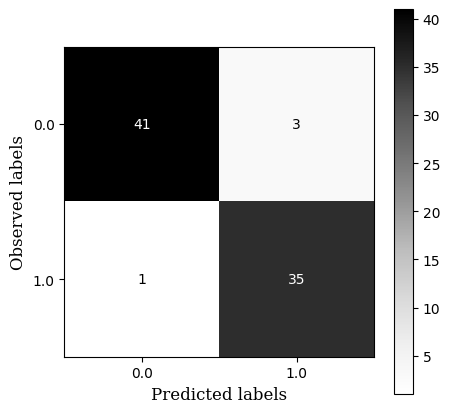

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
# Apply all the transformation on the training set and train an mlp model.
pipeline_mlp=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('mlp_classifier',MLPClassifier(hidden_layer_sizes=[10],max_iter =10000))])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline_mlp.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(5,5))
csfont = {'fontname':'serif'} #define the font family
predictions = pipeline_mlp.predict(X_test) #make predictions on the test set.
# Confusion matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=pipeline_mlp.classes_);
disp.plot(ax=ax, cmap = 'Greys')
# Labels, title and ticks
label_font = {'size':'12'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font,**csfont);
ax.set_ylabel('Observed labels', fontdict=label_font,**csfont);
fig.savefig("Data\confusion.pdf") #save the figure.
#ax.set_title('Confusion Matrix', fontdict=title_font);
plt.show()


## **3.5.2 Loading datasets**

- This module comes with a few small built-in datasets that can be used to illustrate the performance of various machine learning algorithms.
- These are known as the toy datasets and they can be easily loaded with a few lines of codes.
- The main disadvantage of these datasets is that they are too small to be depictive of real-world problems in machine learning.
- Hence this module comes with a dataset fetcher that can be used to download and load larger real-world datasets.
- Additionally, the dataset generator functions can be used for developing controlled artificial datasets.

<>:24: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\p'
C:\Users\aswathyr\AppData\Local\Temp\ipykernel_16964\1786039909.py:24: SyntaxWarning: invalid escape sequence '\p'
  plt.savefig('Data\plot_blobs.pdf')


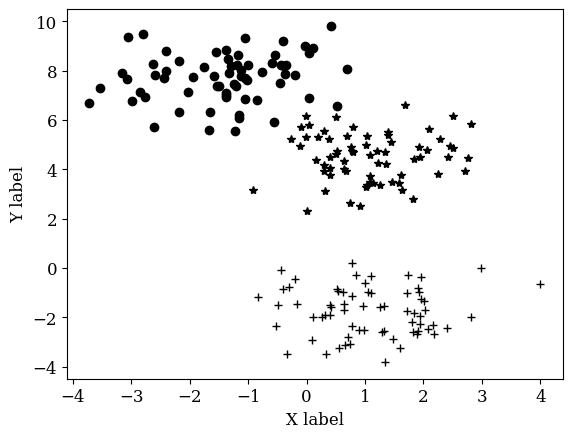

In [5]:
#LOADING THE TOY DATSET
from sklearn import datasets
data = datasets.load_wine() #Load and returns the wine dataset.

#LOADING REAL-WORLD DATASET
from sklearn.datasets import fetch_california_housing
house_data = fetch_california_housing() #Load the California housing dataset.

#LOADING GENERATED DATASET
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
#Develop isotropic Gaussian blobs for clustering.
X, y = make_blobs(n_samples=200, centers=3, n_features=3, random_state=0)
string=['*k','+k','ok']
for j in range(3):
  ind = np.where(y==j)
  plt.plot(X[ind,0],X[ind,1],string[j])
csfont = {'fontname':'serif'}
plt.xlabel("X label",fontsize=12,**csfont)
plt.ylabel("Y label",fontsize=12,**csfont)
plt.xticks(fontsize=12,**csfont)
plt.yticks(fontsize=12,**csfont)
plt.savefig('Data\plot_blobs.pdf')
plt.show()

## **3.5.3 Data preprocessing**
- Standardization: StandardScaler()- Rescales data to have zero mean and unit variance.             MinMaxScaler()- Scaling data to lie between the minimum and maximum value.
- Normalization: Normalizer()- Scaling each data sample to have unit norm.                            - Imputing values: SimpleImputer()-  Filling up missing values using four main strategies such as mean, most_frequent, median, or a constant.
- Polynomial Features: PolynomialFeatures()- Adds complexity to the dataset by generating polynomial features.
- Categorical Features: OneHotEncoder()- Encodes each categorical value into a new categorical column and allocates a binary value to each column. OrdinalEncoding()- Encodes each unique category with a numerical value.
- Numerical Features: KBinsDiscretizer()- Transforms the continuous numerical values into discrete bins. Binarizer()- Assigning a boolean value to each sample by thresholding the numerical features.
- Custom Transformers: FunctionTransformers()- Accepts an existing function and uses it to transform the data.

In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#STANDARDIZATION
arr1 = np.array([[1,2,3],[4,5,6],[7,8,9]]) #define an array.
print("Original array:",arr1)
scale1 = StandardScaler() #define the preprocessing module.
scale2 = MinMaxScaler(feature_range=(0,1)) #define the preprocessing module.
arr_scale1 = scale1.fit_transform(arr1) #fit the transformer to the data.
arr_scale2 = scale2.fit_transform(arr1) #fit the transformer to the data.
org_arr1 = scale1.inverse_transform(arr_scale1) #transform back to original data.
org_arr2 = scale2.inverse_transform(arr_scale2) #transform back to original data.
print("Standardized array:",arr_scale1)
print("Minmax scaled array:",arr_scale2)
print("Transformed the standardized array:",org_arr1)
print("Transformed the minmax scaled array:",org_arr2)

Original array: [[1 2 3]
 [4 5 6]
 [7 8 9]]
Standardized array: [[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]
Minmax scaled array: [[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]
Transformed the standardized array: [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
Transformed the minmax scaled array: [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [7]:
#NORMALIZATION
from sklearn.preprocessing import Normalizer
arr2 = np.array([[100,20,550],[43,620,111],[248,15,89]]) #define an array.
print("Original array:",arr2)
normal = Normalizer() #define the preprocessing module.
arr_normal = normal.fit_transform(arr2) #fit the transformer to the data.
print("Normalized array:",arr_normal)

Original array: [[100  20 550]
 [ 43 620 111]
 [248  15  89]]
Normalized array: [[0.17877106 0.03575421 0.98324084]
 [0.06811083 0.98206308 0.17582097]
 [0.9397041  0.05683694 0.33723252]]


In [8]:
#IMPUTING VALUES
import numpy as np
from sklearn.impute import SimpleImputer
arr3 = np.array([[np.nan, 2, 8, np.nan], [6, np.nan, np.nan, 12], [7, 6, 4, np.nan]]) #define an array.
print("Original array:",arr3)
im = SimpleImputer(missing_values=np.nan, strategy='median') #define the preprocessing module.
arr_im = im.fit_transform(arr3) #fit the transformer to the data.
print("Array after imputing values:",arr_im)

Original array: [[nan  2.  8. nan]
 [ 6. nan nan 12.]
 [ 7.  6.  4. nan]]
Array after imputing values: [[ 6.5  2.   8.  12. ]
 [ 6.   4.   6.  12. ]
 [ 7.   6.   4.  12. ]]


In [9]:
#POLYNOMIAL FEATURES
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
arr4 = np.array([[5,8],[4,3],[7,9]]) #define an array.
print("Original array:",arr4)
poly = PolynomialFeatures(2) #define the preprocessing module.
poly_feat = poly.fit_transform(arr4) #fit the transformer to the data.
print("Polynomial features of array:",poly_feat)

Original array: [[5 8]
 [4 3]
 [7 9]]
Polynomial features of array: [[ 1.  5.  8. 25. 40. 64.]
 [ 1.  4.  3. 16. 12.  9.]
 [ 1.  7.  9. 49. 63. 81.]]


In [10]:
#CATEGORICAL FEATURES
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
arr5 = np.array([[1,'one'],[2,'two'],[3,'three']]) #define an array.
print("Original arry:",arr5)
enc1 = OneHotEncoder() #define the preprocessing module.
enc2 = OrdinalEncoder() #define the preprocessing module.
cat_feat1 = enc1.fit_transform(arr5).toarray() #fit the transformer to the data.
cat_feat2 = enc2.fit_transform(arr5) #fit the transformer to the data.
print("One hot encoded array:",cat_feat1)
print("Ordinal array:",cat_feat2)

Original arry: [['1' 'one']
 ['2' 'two']
 ['3' 'three']]
One hot encoded array: [[1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]]
Ordinal array: [[0. 0.]
 [1. 2.]
 [2. 1.]]


In [11]:
#NUMERICAL FEATURES
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer
arr6 = np.array([[5, 8, 14], [17, 2, 12], [21, 6, 4]]) #define an array.
print("Original array:",arr6)
dis = KBinsDiscretizer(n_bins=[2, 3, 2], encode='ordinal') #define the preprocessing module.
bina = Binarizer(threshold=10, copy=True) #define the preprocessing module.
num_feat1 = dis.fit_transform(arr6) #fit the transformer to the data.
num_feat2 = bina.fit_transform(arr6) #fit the transformer to the data.
print("Array with bins:",num_feat1)
print("Binarized array:",num_feat2)

Original array: [[ 5  8 14]
 [17  2 12]
 [21  6  4]]
Array with bins: [[0. 2. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]
Binarized array: [[0 0 1]
 [1 0 1]
 [1 0 0]]


In [12]:
#CUSTOM TRANSFORMERS
import numpy as np
from sklearn.preprocessing import FunctionTransformer
arr7 = np.array([[3, 9], [18, 27], [39, 63]]) #define an array.
print("Original array:",arr7)
trans = FunctionTransformer(np.expm1, validate=True) #define the preprocessing module.
cust_feat = trans.transform(arr7) #fit the transformer (exp(x)-1) to the data.
print("Transformed array:",cust_feat)

Original array: [[ 3  9]
 [18 27]
 [39 63]]
Transformed array: [[1.90855369e+01 8.10208393e+03]
 [6.56599681e+07 5.32048241e+11]
 [8.65934004e+16 2.29378316e+27]]


## **3.5.4 Feature Selection**
- This process helps in the selection of the most relevant features from the data that contribute most to the prediction.
- Two of the widely used methods are Recursive Feature Elimination (RFE) and SelectKBest.
- RFE feature selector essentially is a backward selection process, that allows eliminating the least significant features after recursively training.
- SelectKBest is one of the univariate feature selection methods that can be used to select 'K' number of features based on statistical test results.

In [13]:
#Recursive Feature Elimination
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
dat1 = sns.load_dataset('anagrams') #Load the dataset.
X1 = dat1.drop('attnr', axis = 1) #Create the independent variable.
y1 = dat1['attnr'] #Create the dependent variable.
#Select the significant features using Gradient boosting classifier
rfe = RFE(estimator=GradientBoostingClassifier(),n_features_to_select =2)
rfe.fit(X1, y1) #Fit the model.
print(X1.columns[rfe.get_support()]) #Display the best 2 features.


Index(['subidr', 'num3'], dtype='object')


# Example 3.5.2
In this example we discuss how to perform feature selection using SelectKBest.

In [14]:
#SelectKBest
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_regression
dat = sns.load_dataset('diamonds') #Load the dataset.
dat = dat.select_dtypes('number').dropna() #Select only numerical columns and drop the rest.
X = dat.drop('carat' , axis =1) #Create the independent variable.
y = dat['carat'] #Create the dependent variable.
#Use mutual info regression to select the top 3 features.
select = SelectKBest(mutual_info_regression, k=3)
select.fit(X, y) #Fit the model.
print(X.columns[select.get_support()]) #Display the top 3 features.

Index(['x', 'y', 'z'], dtype='object')


## **3.5.5 Supervised and Unsupervised Learning Models**
In general, machine learning algorithms can be either supervised or unsupervised.
- Supervised regression models: Linear regression, Logistic regression, Ridge regression, Lasso regression, etc.
- Supervised classification models: Decision trees, Naive Bayes Classifier, Support Vector Machines, Random Forests, etc.  
- Unsupervised manifold learning models: Isomap, t-SNE, etc.
- Unsupervised clustering models: K-Means, Gaussian Mixture Models, etc.


In [15]:
#Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Create a numpy array of data:
X = np.array([5, 10, 15, 20, 25, 30]).reshape((-1, 1))
y = np.array([12, 20, 25, 32, 35, 40])
model = LinearRegression() #Create a linear regression model.
model_fit = model.fit(X, y) #Fit the model.
y_pred = model_fit.predict(X) #Make predictions using the model.
print('Prediction:', y_pred) #Display the predictions.



Prediction: [13.61904762 19.1047619  24.59047619 30.07619048 35.56190476 41.04761905]


In [16]:
#Classification
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
ds = load_breast_cancer() #Load the dataset.
#Display the size of the feature and the label.
print('Dataset Size : ', ds.data.shape, ds.target.shape)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(ds.data, ds.target, test_size=0.2)
clf = svm.SVC(kernel='rbf') #Use the non linear kernel of SVM for classification.
clf.fit(X_train, y_train) #Fit the model.
y_pred = clf.predict(X_test) #Make predictions using the model.
#Display the accuracy score.
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Dataset Size :  (569, 30) (569,)
Accuracy: 0.8508771929824561


In [17]:
#Dimensionality Reduction
from sklearn.datasets import load_digits
from sklearn import manifold
digits = load_digits(n_class=6) #Load the dataset.
#Assign the feature and labels to variables.
X_digits, Y_digits  = digits.data, digits. target
#Display the size of the features.
print('Dataset Size : ', X_digits.shape)
#Define the Isomap model for dimensionality reduction.
isomap = manifold.Isomap(n_neighbors=10)
# Fit the model
X_iso= isomap.fit_transform(X_digits)
#Display the size of the reduced feature set.
print('Reduced Feature Size : ', X_iso.shape)


Dataset Size :  (1083, 64)
Reduced Feature Size :  (1083, 2)


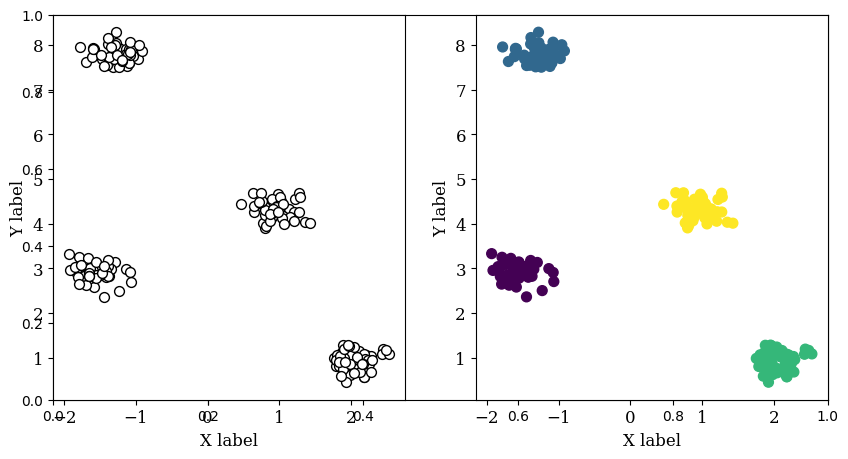

In [18]:
#Clustering
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
# Create dataset
X, y = make_blobs(n_samples=200,n_features=2,centers=4,
                  cluster_std=0.2, shuffle=True, random_state=0)
#Define the Gaussian Mixture Model with clusters.
gmm = GaussianMixture(n_components=4).fit(X)
#Predicts the labels for the features.
labels = gmm.predict(X)
#Plot the features.
fig, ax = plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o',edgecolor='black', s=50)
csfont = {'fontname':'serif'}
plt.xlabel("X label",fontsize=12,**csfont)
plt.ylabel("Y label",fontsize=12,**csfont)
plt.xticks(fontsize=12,**csfont)
plt.yticks(fontsize=12,**csfont)
#Plot the clusters.
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.xlabel("X label",fontsize=12,**csfont)
plt.ylabel("Y label",fontsize=12,**csfont)
plt.xticks(fontsize=12,**csfont)
plt.yticks(fontsize=12,**csfont)
plt.show()

## **3.5.6 Model selection and evaluation**
- Model selection is an iterative process of finding the best model by evaluating its performance and tuning the hyperparameters of this model.
- Scikit-learn offers us many cross-validation techniques such as  KFold, Stratified k-fold, and Leave One Out.
- Following this various performance measures such as accuracy, precision, recall, and mean squared error are used in order to assess the quality of the model.


In [19]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

dataset = load_iris() #Load the dataset
X, y = dataset.data, dataset.target #Assign the feature and labels to variables.
#Display the size of the features and labels.
print('Dataset Size : ', X.shape, y.shape)
scores = list()
# Initialize k-fold cross validation
k_fo = KFold(n_splits=5, shuffle=True)
# enumerate splits
count = 0
for train_i, test_i in k_fo.split(X):
    count = count+1
    train_X, test_X = X[train_i], X[test_i] #Extract the train and test data.
    train_y, test_y = y[train_i], y[test_i] #Extract the train and test data.
    model = LogisticRegression(solver= 'liblinear') #Assign the logistic regression model.
    model.fit(train_X, train_y) #Fit the model.
    yhat = model.predict(test_X) #Make predictions.
    acc = accuracy_score(test_y, yhat) #Evaluate the predictions using accuracy score.
    scores.append(acc)
    print('Accuracy for Fold {}: '.format(count), acc) #Print the accuracy for each fold.


Dataset Size :  (150, 4) (150,)
Accuracy for Fold 1:  0.9666666666666667
Accuracy for Fold 2:  0.9
Accuracy for Fold 3:  0.8666666666666667
Accuracy for Fold 4:  1.0
Accuracy for Fold 5:  0.9666666666666667
